# **Using different ML Classifiers to Predict Quality of Wine Sample**


##Classifiers Used

*   Random Forest Classifier
*   Support Vector Classifier
*   Stochastic Gradient Descent Classifier

##Model Verification
*   Accuracy
*   F1 Score

# Skills
* ### Statistical Analysis
* ### Unsupervised Learning
* ### Predictive Analysis

* ### Programming
*   **Language :**   Python
*   **Libraries:** 
   * Scikit-learn
   * matplotlib
   * seaborn
   * pandas
   * numpy


In [ ]:
# import libraries

import numpy as np
import pandas as pd

# Data Processing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

# Metrics
from sklearn.metrics import confusion_matrix, classification_report

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Loading Data

wine_data = pd.read_csv('/content/winequality-red.csv')
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
#Information about the data columns
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


*Target: To predict the quality of wine*

**Target column: quality**

Let's view how each column varies with the target column i.e quality

In [ ]:
# Separating Train and Test Data
wine_train, wine_test = train_test_split(wine_data, test_size = 0.2, random_state = 42)


wine_train_x = wine_train.iloc[:,:-1]         #Droping the target column i.e 'Quality' from Train
wine_train_y = wine_train.iloc[:,11]          #Only the target column

wine_test_x = wine_test.iloc[:,:-1]           #Droping the target column i.e 'Quality' from Test
wine_test_y = wine_test.iloc[:,11]            #Only the target column

In [ ]:
wine_train_x.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9


In [ ]:
wine_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Exploratory Data Analysis on Train Data

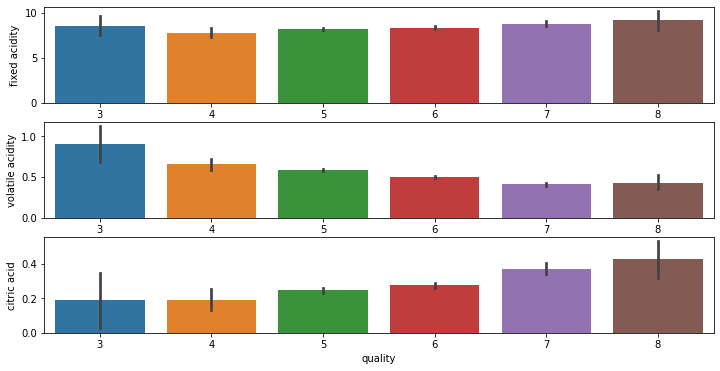

In [ ]:
fig = plt.figure(figsize = (12,6))
plt.subplot(3, 1,1)
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine_train)
plt.subplot(3, 1,2)
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_train)
plt.subplot(3, 1,3)
sns.barplot(x = 'quality', y = 'citric acid', data = wine_train)

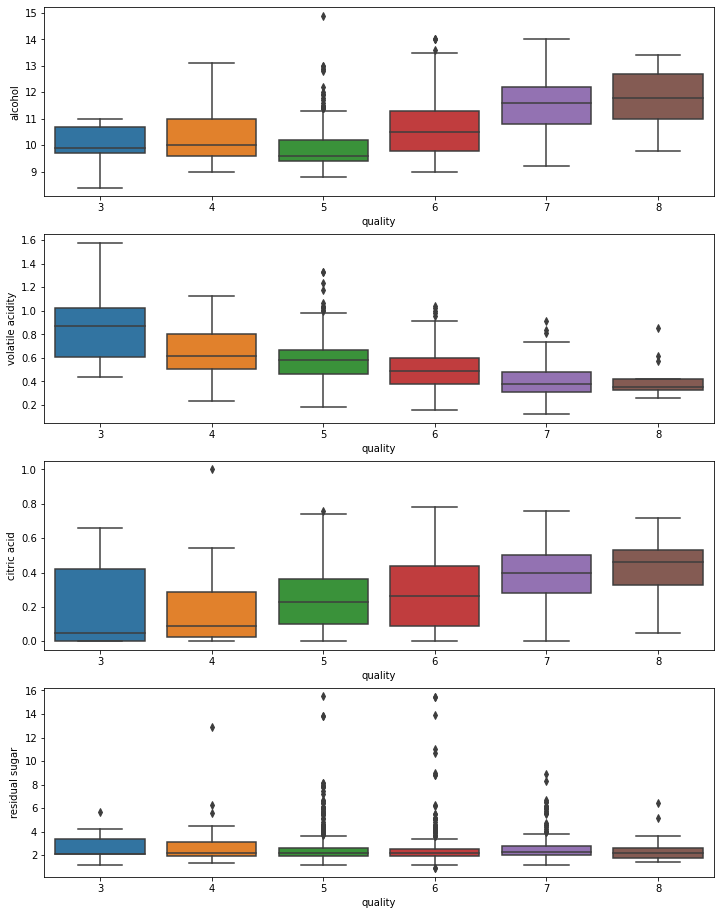

In [ ]:
fig1 = plt.figure(figsize = (12,16))
plt.subplot(4,1,1)
sns.boxplot(x = 'quality', y = 'alcohol',data = wine_train)

plt.subplot(4,1,2)
sns.boxplot(x = 'quality', y = 'volatile acidity',data = wine_train)

plt.subplot(4,1,3)
sns.boxplot(x = 'quality', y = 'citric acid',data = wine_train)

plt.subplot(4,1,4)
sns.boxplot(x = 'quality', y = 'residual sugar',data = wine_train)

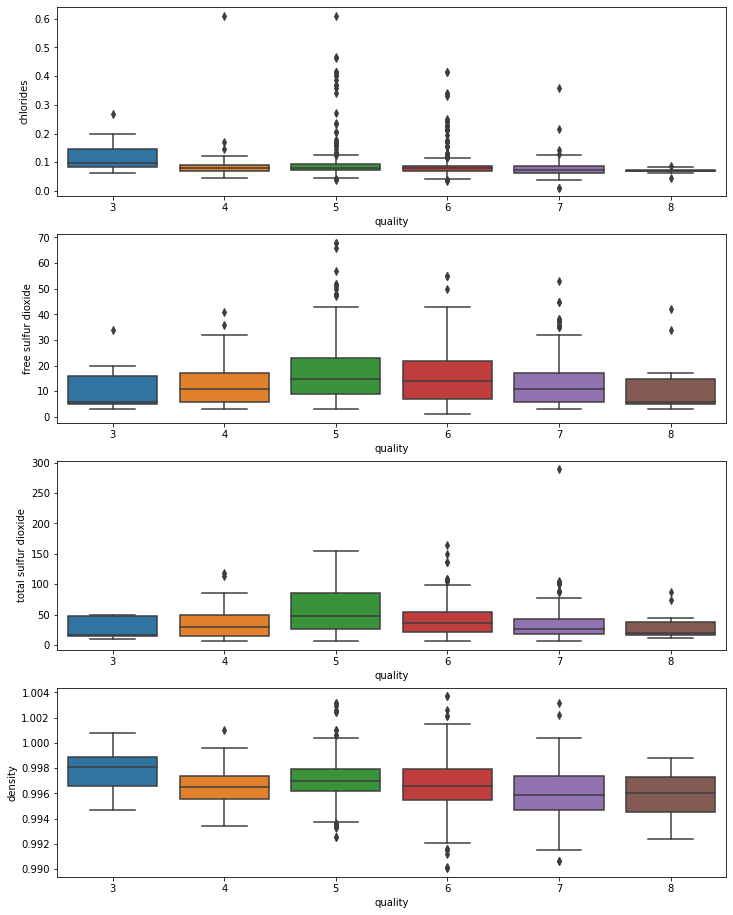

In [ ]:
fig2 = plt.figure(figsize = (12,16))
plt.subplot(4,1,1)
sns.boxplot(x = 'quality', y = 'chlorides',data = wine_train)

plt.subplot(4,1,2)
sns.boxplot(x = 'quality', y =  'free sulfur dioxide',data = wine_train)

plt.subplot(4,1,3)
sns.boxplot(x = 'quality', y = 'total sulfur dioxide',data = wine_train)

plt.subplot(4,1,4)
sns.boxplot(x = 'quality', y = 'density',data = wine_train)

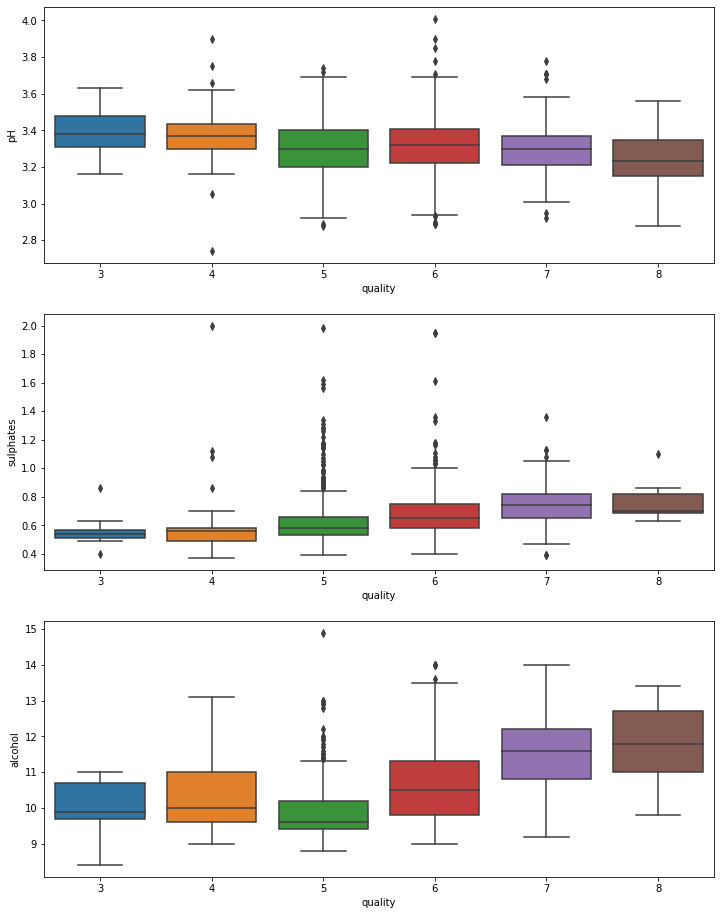

In [ ]:
fig3 = plt.figure(figsize = (12,16))
plt.subplot(3,1,1)
sns.boxplot(x = 'quality', y = 'pH',data = wine_train)

plt.subplot(3,1,2)
sns.boxplot(x = 'quality', y =  'sulphates',data = wine_train)

plt.subplot(3,1,3)
sns.boxplot(x = 'quality', y = 'alcohol',data = wine_train)

In [ ]:
# Computiing Correlation
corr = wine_train.corr()
corr.loc['quality',:]

fixed acidity           0.122488
volatile acidity       -0.378372
citric acid             0.216115
residual sugar          0.005425
chlorides              -0.126541
free sulfur dioxide    -0.055860
total sulfur dioxide   -0.200067
density                -0.167091
pH                     -0.045185
sulphates               0.242596
alcohol                 0.472676
quality                 1.000000
Name: quality, dtype: float64

At a first glance the above Correlation between 'Quality' and other columns shows that
*residual sugar, chlorides, free sulphur dioxide and pH* 
have very less influence on target column *Quality*

Let's draw a colour heatmap

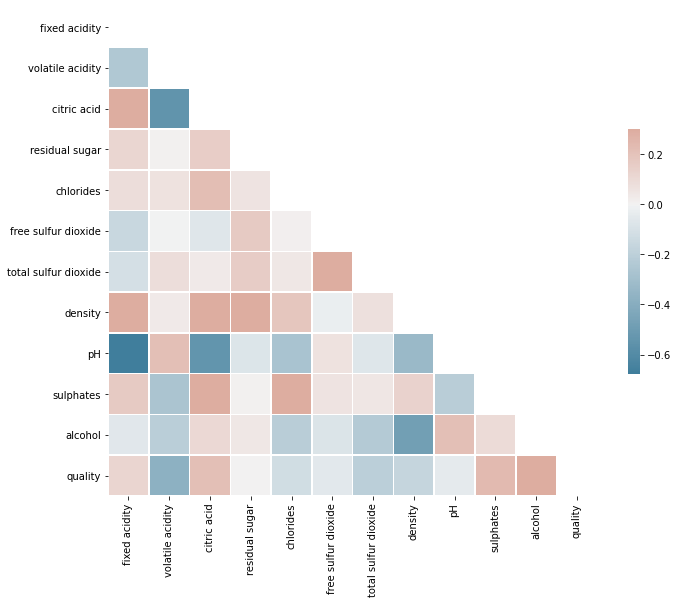

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Here we find that 
* **Residual sugar** shows minimum influence on Quality yet it has strongest *positive* influence on density. This is evident as a higher dense solution will have high *residual sugar*. So, *density* can explain effect of *residual sugar* on the *quality*. Therefore, *Residual Sugar* can safely be removed from predictive analysis as it won't add any information to the analysis.

* **Chlorides** shows very low *negative* influence on Target yet it needs to be kept iin analysis as it has consistent effect on all other columns. Therefore *Chlorides* is an integral part of the analysis.

* **Free Sulphur Dioxide** shows *positive* influence on *Total Sulphur Dioxide*. This is evident as higher Total Sulphur Dioxide will always increase Free Sulphur Dioxide. Therefore, *Free Sulphur Dioxide* can safely be removed from predictive analysis as it won't add any information to the analysis.

* **pH** is a metric of acidity of the solution. It's not independent and cannot be varied on it's own without changing other independent variables. Therefore,*pH* won't add any information to the analysis.



In [ ]:
'''
# Removing Residual Sugar, Free Sulphur Dioxide and pH from Train data.
try:
  wine_train_x = wine_train_x.drop(['residual sugar', 'free sulfur dioxide', 'pH'], axis = 1)
  
  
except KeyError:
  wine_test_x = wine_test_x.drop(['residual sugar', 'free sulfur dioxide', 'pH'], axis = 1)
'''
wine_train_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9
...,...,...,...,...,...,...,...,...,...,...,...
1130,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4
1294,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
860,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5
1459,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9


## Data PreProcessing

In [ ]:
# Checking Data Quality
wine_train_x.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,8.323690,0.530559,0.272471,2.555473,0.088448,15.876075,46.657154,0.996774,3.311650,0.660023,10.418100
std,1.724243,0.179275,0.195448,1.435790,0.049332,10.313517,32.941962,0.001856,0.154016,0.174605,1.052694
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.370000,8.400000
25%,7.100000,0.400000,0.100000,1.900000,0.071000,7.000000,22.000000,0.995655,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.080000,14.000000,38.000000,0.996800,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997845,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [ ]:
# Finding if any NA or NULL value is present or not
# wine_train_x_na = wine_train_x.notna()
for column in wine_train_x.columns:
  if wine_train_x[column].isnull().sum() > 0:
    print("Null Found in Column: ", column)
  else:
    print("NO Null Found in Column: ", column)

# Result: No null value



NO Null Found in Column:  fixed acidity
NO Null Found in Column:  volatile acidity
NO Null Found in Column:  citric acid
NO Null Found in Column:  residual sugar
NO Null Found in Column:  chlorides
NO Null Found in Column:  free sulfur dioxide
NO Null Found in Column:  total sulfur dioxide
NO Null Found in Column:  density
NO Null Found in Column:  pH
NO Null Found in Column:  sulphates
NO Null Found in Column:  alcohol


In [ ]:
# Since it's a classification type,
# Normalizing data in each column
normal = StandardScaler()
normal.fit_transform(wine_train_x)

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

# Predictive Analysis

Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier()

# With Default hyperparameters
rfc.fit( wine_train_x, wine_train_y)
wine_pred_y = rfc.predict(wine_test_x)

In [ ]:
# Prediction Score
wine_test_y_array = np.asarray(wine_test_y)
rfc_report = classification_report(wine_test_y_array,wine_pred_y)
print(rfc_report)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.73      0.77      0.75       130
           6       0.66      0.74      0.70       132
           7       0.69      0.57      0.62        42
           8       0.00      0.00      0.00         5

    accuracy                           0.69       320
   macro avg       0.35      0.35      0.35       320
weighted avg       0.66      0.69      0.67       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(wine_test_y_array,wine_pred_y, labels = [3,4,5,6,7,8]))

[[  0   0   1   0   0   0]
 [  0   0   7   3   0   0]
 [  0   0 100  29   1   0]
 [  0   0  29  98   5   0]
 [  0   0   0  18  24   0]
 [  0   0   0   0   5   0]]
